## Exercise 


For this exercise, you will be working with the [House Price Dataset](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/code).

Please grab the train.csv file from Kaggle and explore this dataset. You need to perform explroatory data analysis and see if there is any correlation between the variables and analyze the distribution of the dataset. The question is open-ended and basically you're asked to perform EDA. 


1- Write a summary of your findings in one page (e.g., summary statistics, plots) and submit the pdf file. Therefore, for part 3 of your assignment, you need to submit at least one jupyter notebook file and one pdf file.


2- Push your code and project to github and provide the link to your code here. Ensure that your github project is organized to at least couple of main folders, ensure that you have the README file as well:

- Src
- Data
- Docs
- Results

Read this link for further info:  https://gist.github.com/ericmjl/27e50331f24db3e8f957d1fe7bbbe510





In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv('train.csv')

In [15]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Preliminary EDA

In [16]:
df[['LotFrontage', 'LotArea', 'PoolArea', 'MiscVal', 'SalePrice']].describe()  #summary statistics of some numerical variables

,LotFrontage,LotArea,PoolArea,MiscVal,SalePrice
count,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,2.758904,43.489041,180921.195890
std,24.284752,9981.264932,40.177307,496.123024,79442.502883
min,21.000000,1300.000000,0.000000,0.000000,34900.000000
25%,59.000000,7553.500000,0.000000,0.000000,129975.000000
50%,69.000000,9478.500000,0.000000,0.000000,163000.000000
75%,80.000000,11601.500000,0.000000,0.000000,214000.000000
max,313.000000,215245.000000,738.000000,15500.000000,755000.000000


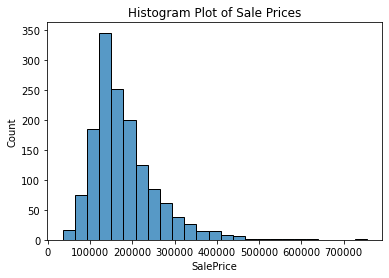

In [17]:
sns.histplot(df['SalePrice'], bins = 25);
plt.title("Histogram Plot of Sale Prices");

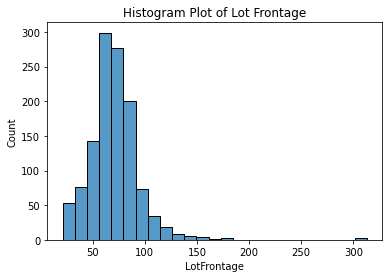

In [46]:
sns.histplot(df['LotFrontage'], bins = 25);
plt.title("Histogram Plot of Lot Frontage");

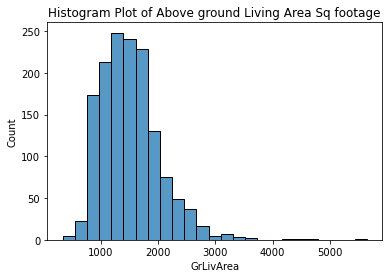

In [49]:
sns.histplot(df['GrLivArea'], bins = 25);
plt.title("Histogram Plot of Above ground Living Area Sq footage");

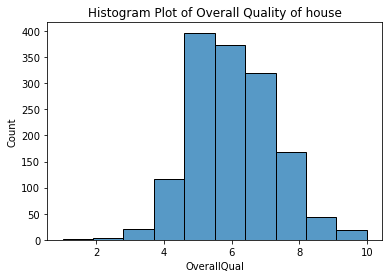

In [47]:
sns.histplot(df['OverallQual'], bins = 10);
plt.title("Histogram Plot of Overall Quality of house");

In [48]:
df.Street.unique()  #check what the values are and if it is a suitable variable to analyze, avoiding variables with many unique labels

array(['Pave', 'Grvl'], dtype=object)

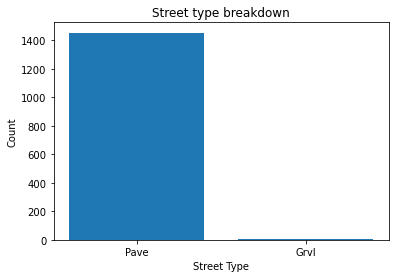

In [39]:
plt.bar(['Pave', 'Grvl'], df.Street.value_counts());
plt.title("Street type breakdown");
plt.xlabel('Street Type');
plt.ylabel("Count");

Vast majority of houses are paved, doesn't seem like there will be much suitable analysis here.

In [40]:
df.BldgType.unique()

array(['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'], dtype=object)

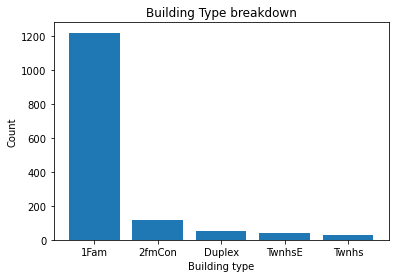

In [34]:
plt.bar(['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'], df.BldgType.value_counts());
plt.title("Building Type breakdown");
plt.xlabel('Building type');
plt.ylabel("Count");

Vast majority are Single-Family detached households, but there is decent representaiton of the other categories as well.

# Is there any correlation between Lot Frontage and Sale Price

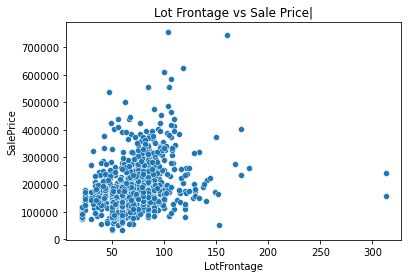

In [37]:
sns.scatterplot(data=df, x='LotFrontage', y='SalePrice');
plt.title('Lot Frontage vs Sale Price | Scatter Plot');

In [38]:
df[['LotFrontage', 'SalePrice']].corr()

,LotFrontage,SalePrice
LotFrontage,1.000000,0.351799
SalePrice,0.351799,1.000000


From the correlation coefficient and the scatter plot, there seems to be some weak positive correlation.

# Is there any association between overall quality of house and Sale price

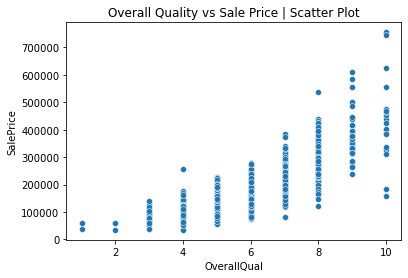

In [42]:
sns.scatterplot(data=df, x='OverallQual', y='SalePrice');
plt.title('Overall Quality vs Sale Price | Scatter Plot');

# Is there any association between Above ground living area and Sale Price

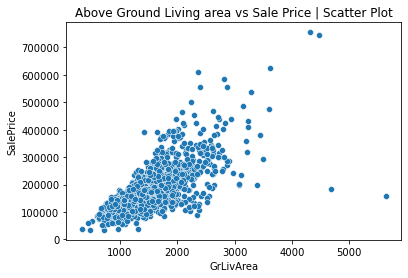

In [50]:
sns.scatterplot(data=df, x='GrLivArea', y='SalePrice');
plt.title('Above Ground Living area vs Sale Price | Scatter Plot');

In [51]:
df[['GrLivArea', 'SalePrice']].corr()

,GrLivArea,SalePrice
GrLivArea,1.000000,0.708624
SalePrice,0.708624,1.000000


https://github.com/Linuis12/Assignment-3-Part-3